# Importing Libraries and Loading the Dataset

In [55]:
import os
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
# Loading the data in a pandas dataframe
dataset_root = 'nsl-kdd'
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']

category = defaultdict(list)
category['benign'].append('normal')

with open('training_attack_types.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)
#print(category)

attack_mapping = dict((v,k) for k in category for v in category[k])
#print(attack_mapping)

#load train/test files
train_file = os.path.join(dataset_root, 'KDDTrain+.txt')
test_file = os.path.join(dataset_root, 'KDDTest+.txt')

In [57]:
test_file

'nsl-kdd\\KDDTest+.txt'

In [4]:
train_file

'nsl-kdd\\KDDTrain+.txt'

In [5]:
train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'] \
    .map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True)

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
.map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

In [6]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,benign
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,benign
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,benign
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,benign


In [7]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,benign
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,probe


In [8]:
print('The size of the Training Dataset is ',train_df.shape)
print('The size of the Test Dataset is ',test_df.shape)

The size of the Training Dataset is  (125973, 43)
The size of the Test Dataset is  (22544, 43)


## Data Cleaning

##### Check for Missing Values

In [9]:
train_df.isnull().sum()
# No Missing Values

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
train_df.info()
# Looking for anomalies in the data type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
train_df.describe()
# Only the Numerical Features
# Understanding the Central Tendency , Standard Deviation and Distribution of the data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Splitting the Categorical and Numerical Features
num_feats = [x for x in train_df.columns if train_df[x].dtype != "O"]
categorical_feats = [x for x in train_df.columns if train_df[x].dtype == "O"]

In [13]:
train_df[categorical_feats].describe()

,protocol_type,service,flag,attack_type,attack_category
count,125973,125973,125973,125973,125973
unique,3,70,11,23,5
top,tcp,http,SF,normal,benign
freq,102689,40338,74945,67343,67343


# Exploratory Data Analysis

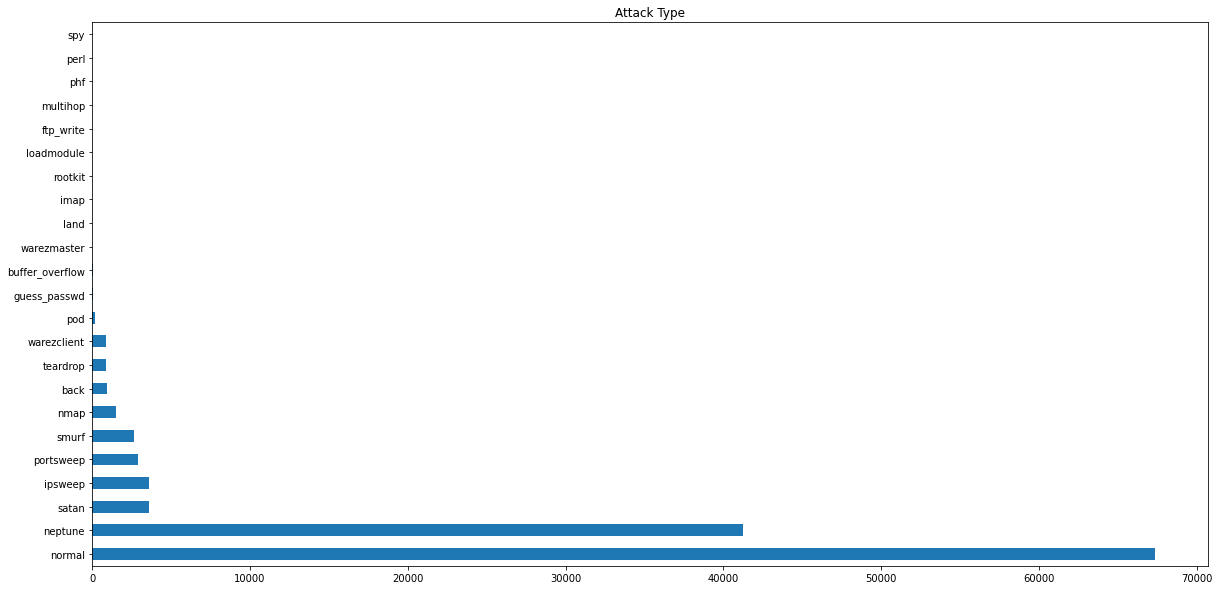

In [14]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()
plt.figure(figsize =(20,10))
train_attack_types.plot(kind='barh')
# sns.countplot(train_attack_types)
plt.title("Attack Type")
plt.show()

In [15]:
train_attack_types

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_type, dtype: int64

In [16]:
train_attack_cats

benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64

C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='attack_category', ylabel='count'>

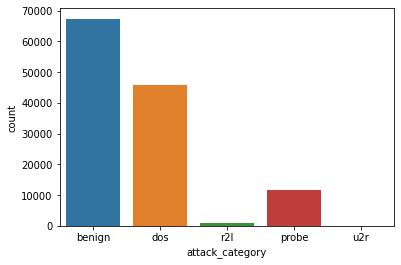

In [17]:
sns.countplot(train_df["attack_category"])

In [18]:
categorical_feats

['protocol_type', 'service', 'flag', 'attack_type', 'attack_category']

C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

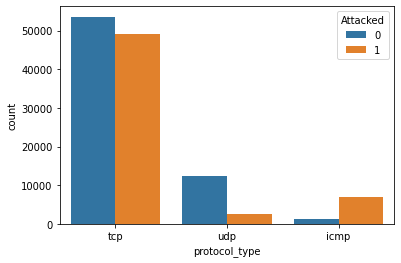

In [23]:
sns.countplot(train_df["protocol_type"],hue = train_df["Attacked"])
# ICMP has been compromised for the attackers

In [20]:
train_attack_types

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_type, dtype: int64

In [21]:
def map_normal(at):
    if at == "normal":
        return 0
    else:
        return 1
train_df["Attacked"] = train_df["attack_type"].map(map_normal)

In [22]:
train_df["Attacked"].value_counts()

0    67343
1    58630
Name: Attacked, dtype: int64

In [24]:
# helper function for drawing mulitple charts.
import itertools
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Services",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs   



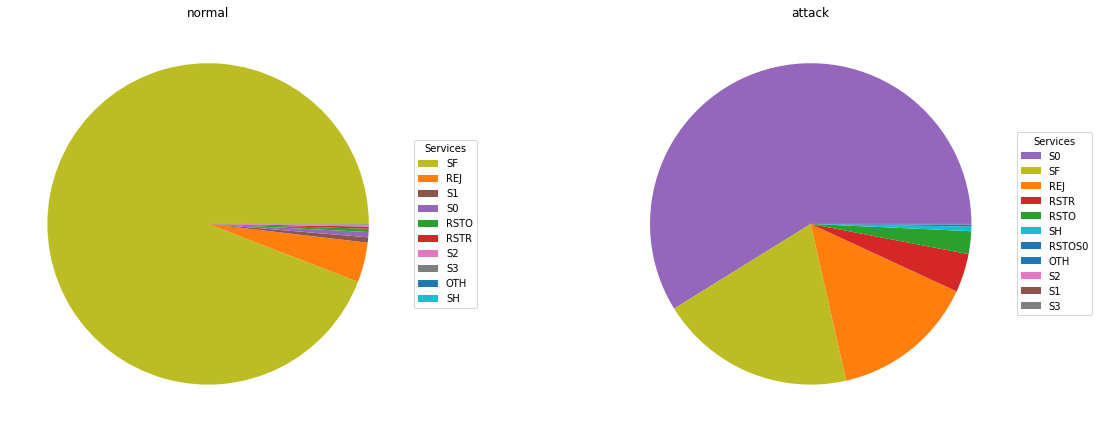

In [25]:
# get a series with the count of each flag for attack and normal traffic
normal_flags = train_df.loc[train_df.Attacked == 0].flag.value_counts()
attack_flags = train_df.loc[train_df.Attacked == 1].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

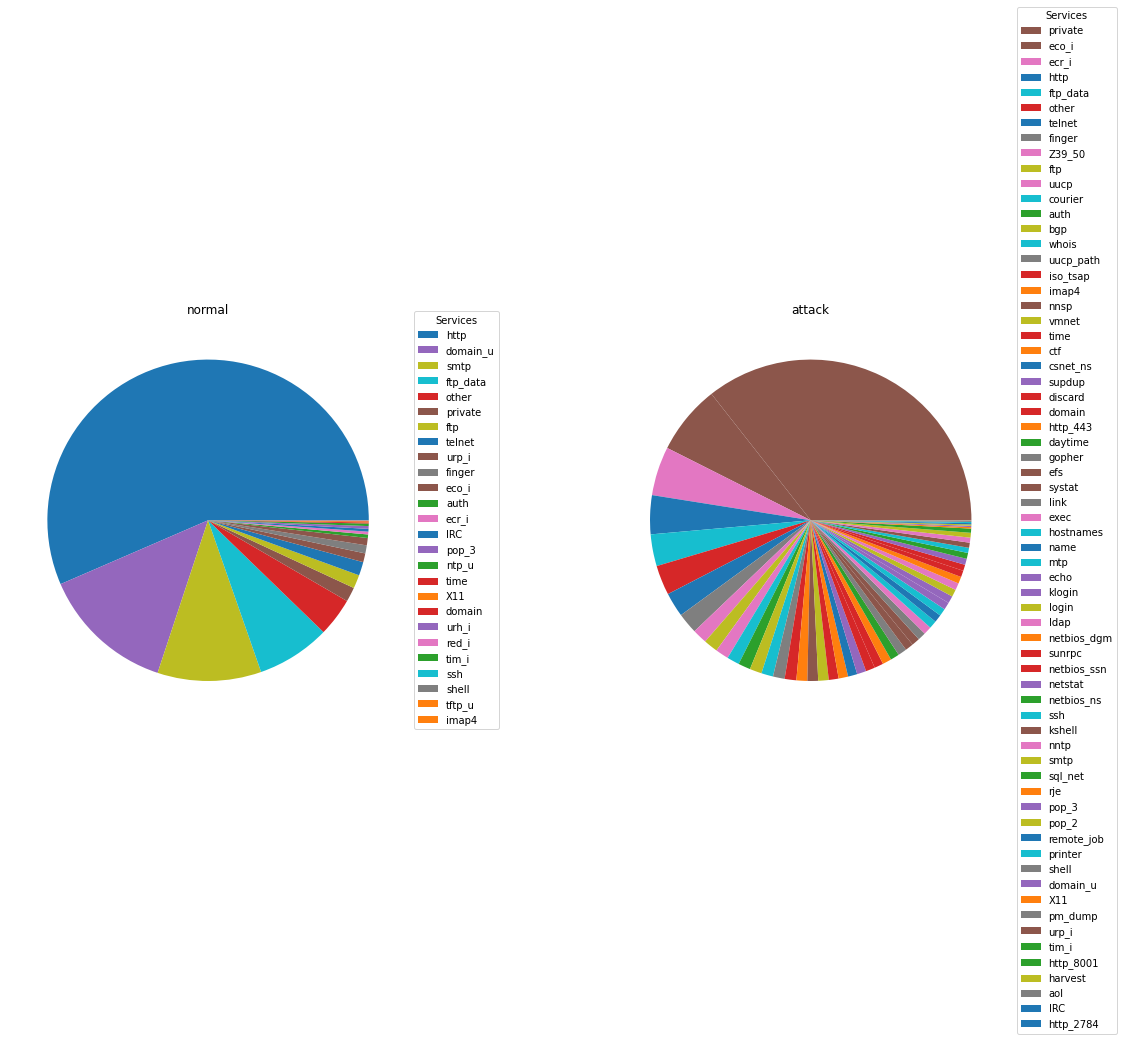

In [26]:
# get a series with the count of each service for attack and normal traffic
normal_services = train_df.loc[train_df.Attacked == 0].service.value_counts()
attack_services = train_df.loc[train_df.Attacked == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])        
plt.show()


# Feature Engineering

In [27]:
train_df = train_df.drop(["Attacked"],axis=1)

In [28]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,benign
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,benign
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,benign
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,benign


In [29]:
train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

In [30]:
feature_names = defaultdict(list)

with open('kddcup.names.txt', 'r') as f:
    for line in f.readlines()[1:]:
        name, nature = line.strip()[:-1].split(': ')
        feature_names[nature].append(name)

print(feature_names)

defaultdict(<class 'list'>, {'continuous': ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], 'symbolic': ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']})


In [31]:
# Concatenate DataFrames
combined_df_raw = pd.concat([train_x_raw, test_x_raw])

### Handling Categorical Features : One Hot Encdoing

In [32]:
# Keep track of continuous, binary, and nominal features
continuous_features = feature_names['continuous']
continuous_features.remove('root_shell')			#Dataset has an error
binary_features = ['land','logged_in','root_shell', 'su_attempted','is_host_login', 'is_guest_login']
nominal_features = list(set(feature_names['symbolic']) - set(binary_features))

In [33]:
# Generate dummy variables
combined_df = pd.get_dummies(combined_df_raw, \
columns=feature_names['symbolic'], \
drop_first=True)


In [34]:
# Separate into training and test sets again
train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

In [35]:
# Keep track of dummy variables
dummy_variables = list(set(train_x)-set(combined_df_raw))

#train_x.describe()

In [36]:
train_x.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,is_host_login_1,is_guest_login_1
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151,0.000198,0.395736,0.000008,0.009423
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332,0.014086,0.489010,0.002817,0.096612
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Scaling

In [37]:
# Fit StandardScaler to the training data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(train_x[continuous_features])
# Standardize training data
train_x[continuous_features] = \
    standard_scaler.transform(train_x[continuous_features])
# Standardize test data with scaler fitted to training data
test_x[continuous_features] = \
    standard_scaler.transform(test_x[continuous_features])

C:\Users\vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

# Building the Classification Model

#### 1. Decision Tree

In [38]:
## Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,zero_one_loss
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(train_x, train_Y)
pred_y = classifier.predict(test_x)
results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

In [39]:
print(classification_report(test_Y,pred_y))

              precision    recall  f1-score   support

      benign       0.69      0.97      0.81      9711
         dos       0.96      0.80      0.87      7636
       probe       0.82      0.62      0.71      2423
         r2l       0.97      0.11      0.19      2574
         u2r       0.03      0.05      0.04       200

    accuracy                           0.77     22544
   macro avg       0.69      0.51      0.52     22544
weighted avg       0.82      0.77      0.74     22544



In [40]:
accuracy_score(test_Y,pred_y)

0.7674325762952449

In [41]:
results

array([[9437,   59,  211,    2,    2],
       [1458, 6075,  103,    0,    0],
       [ 704,  216, 1503,    0,    0],
       [1934,    0,   16,  276,  348],
       [ 180,    0,    4,    6,   10]], dtype=int64)

<AxesSubplot:>

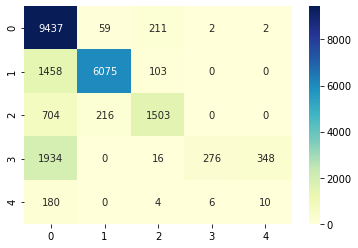

In [42]:
sns.heatmap(results,cmap="YlGnBu",fmt = "d",annot=True)

#### 2. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x,train_Y)

In [ ]:
print(accuracy_score(test_Y,rf.predict(test_x)))

In [ ]:
print(classification_report(test_Y,rf.predict(test_x)))

In [ ]:
confusion_matrix(test_Y,rf.predict(test_x))

#### 3. XGBoost

In [ ]:
#### from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(train_x,train_Y)

In [ ]:
y_xg = xg.predict(test_x)
print(classification_report(test_Y,y_xg))

#### Grid Search and Cross-Validation on Decision Trees

In [63]:
# Hyper parameters range intialization for tuning 

parameters={ "criterion" : ["gini","entropy"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4,5],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2",None],
           "max_leaf_nodes":[None,10,20,30] }

In [59]:
from sklearn.model_selection import GridSearchCV

In [64]:
tuning_model=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=2)

In [65]:
tuning_model.fit(train_x,train_Y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'max_features': ['auto', 'log2', None],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [67]:
tuning_model.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4}

In [68]:
y_grid = tuning_model.predict(test_x)

In [70]:
print(classification_report(test_Y,y_grid))

              precision    recall  f1-score   support

      benign       0.68      0.97      0.80      9711
         dos       0.96      0.79      0.87      7636
       probe       0.76      0.68      0.72      2423
         r2l       0.92      0.09      0.17      2574
         u2r       0.67      0.02      0.04       200

    accuracy                           0.77     22544
   macro avg       0.80      0.51      0.52     22544
weighted avg       0.81      0.77      0.74     22544

